In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

%matplotlib inline
%load_ext nb_black

plt.rcParams["figure.figsize"] = (14, 7)

<IPython.core.display.Javascript object>

-------------

In [2]:
def read_agi(filename, year):
    col_names = [
        "STATEFIPS",
        "STATE",
        "ZIPCODE",
        "AGI_STUB",
        "N1",
        # "N2",
        "A00100",
        # "A02650",
    ]
    col_types = {
        "STATEFIPS": str,
        "STATE": str,
        "ZIPCODE": str,
        "AGI_STUB": np.int32,
        "N1": np.float64,
        # "N2": np.int32,
        "A00100": np.float64,
        # "A02650": np.float64,
    }
    df = pd.read_csv(filename, usecols=col_names, dtype=col_types)
    df.rename(
        columns={
            "N1": "num_returns",
            # "N2": "num_individuals",
            "A00100": "agi",
            # "A02650": "total_income",
        },
        inplace=True,
    )
    tax_year = pd.to_datetime(year, format="%Y")
    df["zip_agi"] = df["num_returns"] * df["agi"]
    df = df.groupby(["STATEFIPS", "STATE", "ZIPCODE"]).agg(
        zip_returns=("num_returns", "sum"), zip_agi_total=("zip_agi", "sum")
    )
    df = df.reset_index()
    df["avg_agi"] = round(df["zip_agi_total"] / df["zip_returns"])
    df["year"] = tax_year

    df = df[["year", "STATEFIPS", "STATE", "ZIPCODE", "avg_agi"]]
    
    return df


<IPython.core.display.Javascript object>

In [3]:
agi_files = sorted(os.listdir("../data/income/agi/"))[:12]
agi_df_list = []
for fn in agi_files:
    yr = "20" + fn[:2]
    print(yr)
    print(fn)
    df = read_agi(os.path.join("../data/income/agi/", fn), yr)
    agi_df_list.append(df)

agi_df = pd.concat(agi_df_list)
agi_df = agi_df[~agi_df.ZIPCODE.isin(["00000", "99999"])]
agi_df.columns = [cn.lower() for cn in agi_df.columns]

agi_df

2009
09zpallagi.csv
2010
10zpallagi.csv
2011
11zpallagi.csv
2012
12zpallagi.csv
2013
13zpallagi.csv
2014
14zpallagi.csv
2015
15zpallagi.csv
2016
16zpallagi.csv
2017
17zpallagi.csv
2018
18zpallagi.csv
2019
19zpallagi.csv
2020
20zpallagi.csv


,year,statefips,state,zipcode,avg_agi
1,2009-01-01,01,AL,35004,39708.0
2,2009-01-01,01,AL,35005,27705.0
3,2009-01-01,01,AL,35006,10514.0
4,2009-01-01,01,AL,35007,93212.0
5,2009-01-01,01,AL,35010,70498.0
...,...,...,...,...,...
27738,2020-01-01,56,WY,83122,2120.0
27739,2020-01-01,56,WY,83126,3097.0
27740,2020-01-01,56,WY,83127,24516.0
27741,2020-01-01,56,WY,83128,26555.0


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Average AGI by zipcode and year')

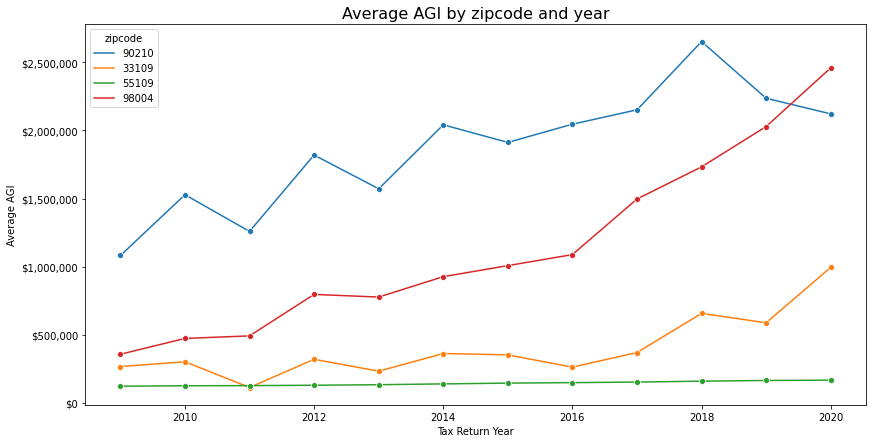

<IPython.core.display.Javascript object>

In [4]:
fig, ax = plt.subplots(1, 1)

g = sns.lineplot(
    data=agi_df[agi_df.zipcode.isin(["55109", "98004", "90210", "33109"])],
    x="year",
    y="avg_agi",
    marker="o",
    hue="zipcode",
    ax=ax,
)

fmt = "${x:,.0f}"
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
g.set_ylabel("Average AGI")
g.set_xlabel("Tax Return Year")
g.set_title("Average AGI by zipcode and year", fontsize=16)

In [5]:
agi_df.sort_values(["year", "state", "zipcode"], inplace=True)

<IPython.core.display.Javascript object>

In [6]:
agi_df.to_csv("../data/modeling/agi.csv", index=False)

<IPython.core.display.Javascript object>